In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
X_train = pd.read_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\X_train.csv')
X_test = pd.read_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\X_test.csv')
y_train = pd.read_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\y_train.csv').squeeze()
y_test = pd.read_csv('C:\\Users\\Admin\\asset_quality_score\\outputs\\y_test.csv').squeeze()

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

model_tf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_tf.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Save Model
model_tf.save('C:\\Users\\Admin\\asset_quality_score\\outputs\\tf_model.h5')


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8990 - loss: 0.2609 - val_accuracy: 0.9367 - val_loss: 0.1715
Epoch 2/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9371 - loss: 0.1753 - val_accuracy: 0.9478 - val_loss: 0.1475
Epoch 3/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9436 - loss: 0.1609 - val_accuracy: 0.9491 - val_loss: 0.1446
Epoch 4/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9456 - loss: 0.1567 - val_accuracy: 0.9513 - val_loss: 0.1384
Epoch 5/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9472 - loss: 0.1532 - val_accuracy: 0.9534 - val_loss: 0.1350
Epoch 6/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9483 - loss: 0.1502 - val_accuracy: 0.9543 - val_loss: 0.1322
Epoch 7/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9494 - loss: 0.1478 - val_accuracy: 0.9561 - val_loss: 0.1284
Epoch 8/20
12578/12578 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)

# Model
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.3)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.2)
        return torch.sigmoid(self.out(x))

model_pt = FeedforwardNN(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_pt.parameters(), lr=0.001)

# Training
for epoch in range(10):
    model_pt.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model_pt(xb).squeeze()
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

# Save model
torch.save(model_pt.state_dict(), 'C:\\Users\\Admin\\asset_quality_score\\outputs\\torch_model.pt')


7861/7861 ━━━━━━━━━━━━━━━━━━━━ 6s 787us/step

📊 TensorFlow Performance
[[219585   1467]
 [  8353  22147]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    221052
         1.0       0.94      0.73      0.82     30500

    accuracy                           0.96    251552
   macro avg       0.95      0.86      0.90    251552
weighted avg       0.96      0.96      0.96    251552

Accuracy: 0.9610
Precision: 0.9379
Recall: 0.7261
F1 Score: 0.8185
ROC AUC: 0.9657

📊 PyTorch Performance
[[218735   2317]
 [  9503  20997]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    221052
         1.0       0.90      0.69      0.78     30500

    accuracy                           0.95    251552
   macro avg       0.93      0.84      0.88    251552
weighted avg       0.95      0.95      0.95    251552

Accuracy: 0.9530
Precision: 0.9006
Recall: 0.6884
F1 Score: 0.7804
ROC AUC: 0.9561


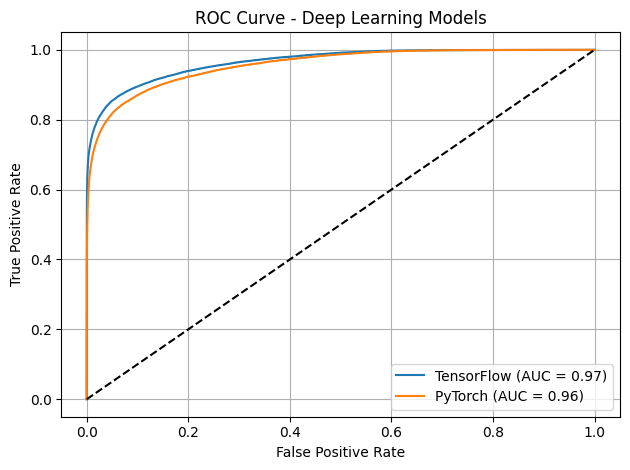

In [6]:
def evaluate_deep_model(y_true, y_prob, name):
    y_pred = (y_prob > 0.5).astype(int)
    print(f"\n📊 {name} Performance")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')

# Evaluate TensorFlow
y_prob_tf = model_tf.predict(X_test_scaled).flatten()
evaluate_deep_model(y_test, y_prob_tf, "TensorFlow")

# Evaluate PyTorch
model_pt.eval()
with torch.no_grad():
    y_prob_pt = model_pt(X_test_tensor).squeeze().numpy()
evaluate_deep_model(y_test, y_prob_pt, "PyTorch")

# ROC Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deep Learning Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
